In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
image_size = [224,224]
data_path = 'Data'

In [3]:
vgg = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

In [4]:
vgg.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [5]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [6]:
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [7]:
preds = Dense(2,activation='softmax')(x)

In [8]:
model = Model(inputs = vgg.input,outputs=preds)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
# for layer in vgg.layers[:20]:
#     layer.trainable=False
# for layer in vgg.layers[20:]:
#     layer.trainable = True

In [11]:
for layer in vgg.layers:
    layer.trainable = False

In [12]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('Data/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 253 images belonging to 2 classes.


In [13]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

253
32
7


In [17]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
7/7 [==============================] - 131s 19s/step - loss: 0.1161 - accuracy: 0.9638
Epoch 2/5
7/7 [==============================] - 131s 19s/step - loss: 0.0656 - accuracy: 0.9910
Epoch 3/5
7/7 [==============================] - 125s 18s/step - loss: 0.0256 - accuracy: 0.9955
Epoch 4/5
7/7 [==============================] - 125s 18s/step - loss: 0.0082 - accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 128s 18s/step - loss: 0.0051 - accuracy: 1.0000


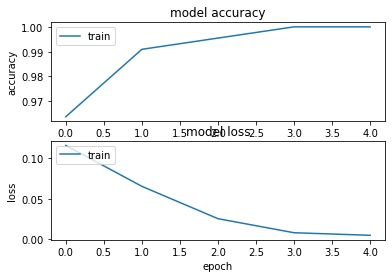

In [18]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 


In [19]:
from tensorflow.keras.models import load_model

In [20]:
model.save('brain_tumor.h5')